In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/Ct/S10K_T100K_p0.9_q0.5.csv')
df.head()


,t,Ct
0,1,1.000000
1,2,0.951550
2,3,0.919200
3,4,0.898525
4,5,0.881340


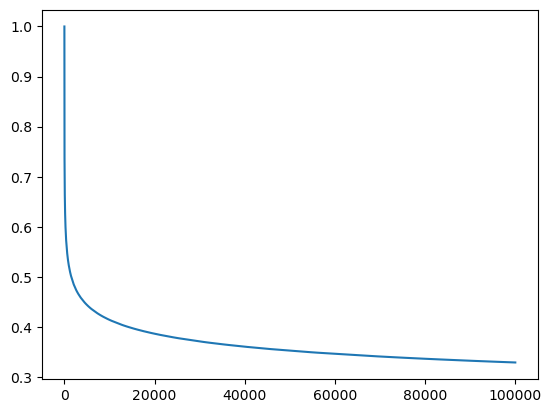

In [3]:
plt.plot(df['t'], df['Ct'])
# plt.yscale('log')


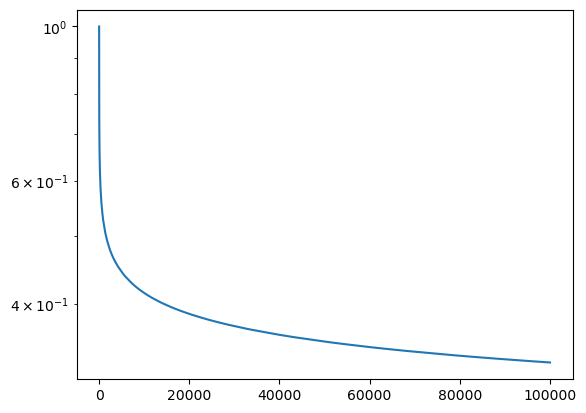

In [4]:
plt.plot(df['t'], df['Ct'])
plt.yscale('log')


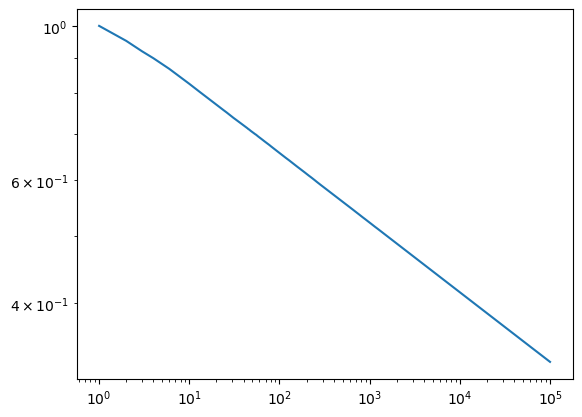

In [5]:
plt.loglog(df['t'], df['Ct'])
